<center><img src='img/ms_logo.jpeg' height=40% width=40%></center>

<center><h1>Regression</h1></center>

Of all the techniques in Machine Learning and Predictive Analytics, **_Regression_** is one of the most mature.  Recall that regression is different from the classification problems we have dealt with so far; whereas classification looks at data and tells us what class it belongs to, regression instead seeks to output a continuous value.  Classification and regression are often two sides of the same coin, and which one you use often depends on the phrasing of the question you're trying to answer.  For this exercise, we'll be trying to predict housing prices on the `boston_housing_prices` data set.  Let's look at an some example questions we could ask about this data set.

<h3>Classification</h3>
* Will this house sell for more or less than this price? *
<br>
* Does this house have less than 3 offers on it? *
<br>
* Based on the price and other data about the house, can we predict if this house has 2 bedrooms, or less, or more?*

<h3>Regression</h3>
* How much do we think this house will sell for? *
<br>
* Based on the data, how many offers do we expect this house to receive? *
<br>
* Based on price and other data about the house, can we predict how many bedrooms a house has? *
<br>
<br>
As you can see, these are pretty much the same question, but phrased differently.  Under the hood, classification is often just a regression, with the caveat that values below the threshold are one class while values above the threshold are another.  

<center><img src='img/classification_vs_regression.png' height=40% width=40%></center>

<center><h2>The Basics: Linear Regression</h2></center>

Before we begin coding, we'll briefly explore how it works and how we can interpret a regression.  This lesson will probably feel more math-heavy than other lessons, and will certainly contain more jargon--but don't worry! The math behind linear regression is fairly intuitive (and fairly simple), and regression is great baseline for understanding how more advanced topics in machine learning work, such as Neural Networks. 

<h3>The Idea Behind Regression</h3>

The most basic form of regression is **_Linear Regression_**.  Linear Regression is a **_Linear Modeling_** technique used to predict a variable as a function of another variable. You've probably seen this written out like this before:

<center><h3>y = f(x)</h3></center>

The most common version of this function (and the one we're trying to discover in Linear Regression) is also one you're likely familiar with:

<center><h3>y = mx + b</h3></center>

This is the basic formula for a line on a cartesian plane that you likely learned in grade school.  In linear regression, our goal is to take some data: 
    

<center><img src='img/scatter.png' height=40% width=40%></center>
<br>
<br>
<center>and discover the function for the **_line of best fit._**</center>
<br>
<br>
<center><img src='img/lbf.png' height=60% width=60%></center>

Let's take a look at the line for the equation and interpret what it means.  You'll often see the the equation for the line of best fit represented like this:

<center><img src='img/regression_equation.png' height=40% width=40%></center>

Let's examine what these symbols mean, and see if we can't 

**_α_**: This value is the bias.  Mathematically, we can think of this as where our line crosses the y-axis.  

**_β_**: is the slope, which defines the relationship between x and y.  In layman's terms, we can interpret this value as how much we expect to y to increase whenever we increase the value of x by 1.  

If we were trying to use linear regression to predict something like how much it would cost for a factory to produce \[x\] widgets, then we could use this equation to make a prediction. In this scenario:

β would represent the cost per unit to produce a widget.  How much we have to spend on manufacturing depends on how many we want ot manufacture.  If we want to manufacture 10,000 widgets and they cost us $.80 each, then the value for β would be .8.

α would represent the fixed costs that don't change with the scale of x. In this scenario, these could be fixed operating costs like how much rent we have to pay to occupy the factory.  There's no avoiding this cost, and it doesn't increase or decrease with our scale.  If the rent for our factory is $10,000/month, then we know we'll have to pay $10,000 this month, regardless of whether we make 1 widget or 1 million widgets.  


<center><h3>Fitting a Linear Regression in Python</h3></center>

In the code block below, we'll create a basic data set that contains some correlation between X and Y.  Then, we'll fit a linear regression to it, and display the line of best fit. Feel free to examine the code and try to figure out how it works, but don't worry if you don't understand everything just yet--this is just help us create a quick visualization of a line of best fit against a scatterplot of data.  

In [12]:

# Miscellaneous import statements and initializers
import seaborn as sns
import numpy as np
import pandas as pd
import statsmodels.api as sm
import matplotlib.pyplot as plt
%matplotlib inline

from scipy import stats
from sklearn.datasets import load_boston
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split, cross_val_score, cross_val_predict, KFold, StratifiedKFold
from sklearn.metrics import accuracy_score, f1_score, classification_report, confusion_matrix

np.random.seed(0)

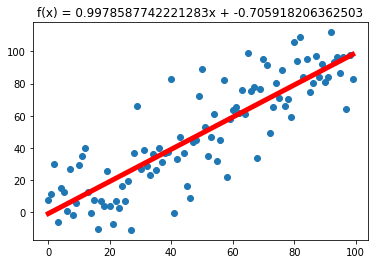

In [13]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
np.random.seed(0)

def generate_dataset(num_samples=100, noise=100):
    '''Generates a random number of samples to act as a dataset for linear regression.'''
    x = []
    y = []
    for i in range(num_samples):
        x.append(i)
        if noise == 0:
            added_noise  = 0
        else:
            upper_noise_limit = noise / 2
            lower_noise_limit = (upper_noise_limit) * -1
            added_noise = np.random.rand() *  np.random.randint(lower_noise_limit, upper_noise_limit)
        y.append(i + added_noise)
    return x, y

def show_best_fit(x, y):
    '''Plots a line of best fit on top of the data points'''
    plt.scatter(x, y)
    plt.plot(np.unique(x), np.poly1d(np.polyfit(x, y, 1))(np.unique(x)), color='red', linewidth=5)
    m, b  = np.polyfit(x, y, 1)
    plt.title("f(x) = {}x + {}".format(m, b))
    
x, y = generate_dataset()
show_best_fit(x, y)

<center><h2>Using Mulitple Regression for the Boston Housing Prices Dataset</h2></center>

In the example above, we were able to graph our findings because we only used 1 predictor.  Although we can't graph really graph a regression that uses more than 2 predictors, we can still fit the regression and use it for making predictions.  In this problem set, that's exactly what we'll do.

<center><h3>About the Data Set</h3></center>

The `Boston_Housing_Prices` dataset is a famous dataset usually used for learning or benchmarking regression techniques.  This dataset contains 14 variables, one of which (MEDV, median value of home) we'll use as our target. All other variables are continuous, with the exception of 1 being binary (if the house shares a border with the Charles River).  For a full description of each predictor, you can [follow this link](https://archive.ics.uci.edu/ml/machine-learning-databases/housing/housing.names), or just examine the `.DESC` attribute of the object `load_boston()` returns.  

<center><h3>Your Task</h3></center>

For this assignment, your task is to:

1. Read in the dataset using sklearn's `load_boston()` function (found in `sklearn.datasets`)
<br>
<br>
2. Perform some basic exploratory data analysis to get a feel for the data.  Graph some stuff!
<br>
<br>
3. Create a **_correlation heatmap_** to check to see how highly correlated our predictor variables are (Remember, if our predictors are highly correlated, this is bad.) . 
<br>
<br>
4. Split the data into training and testing, or use K-Fold Cross Validation.  Your choice.  
<br>
5. Fit a regression model.  Examine the results.  If any of the predictors have a P-value of greater than 0.05, remove that predictor from your dataset and rerun the regression.  Repeat until you have a well-fit regression model. 
<br>
<br>
6. Make predictions on your test set (X_test) and see how well it compares to the actual targets (y_test) from the test set.  


<center>**_Step 1: Import the Data_**</center>

In [14]:
# import the load_boston() function from sklearn.datasets
from sklearn.datasets import load_boston
import pandas as pd

boston_dataset = load_boston()

# Create a dataframe object out of the data.  Use boston.data for the data, and pass boston.feature_names 
# for the columns parameter
dataset, features, class_label_vector = boston_dataset.data, boston_dataset.feature_names, boston_dataset.target
dataset



array([[6.3200e-03, 1.8000e+01, 2.3100e+00, ..., 1.5300e+01, 3.9690e+02,
        4.9800e+00],
       [2.7310e-02, 0.0000e+00, 7.0700e+00, ..., 1.7800e+01, 3.9690e+02,
        9.1400e+00],
       [2.7290e-02, 0.0000e+00, 7.0700e+00, ..., 1.7800e+01, 3.9283e+02,
        4.0300e+00],
       ...,
       [6.0760e-02, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9690e+02,
        5.6400e+00],
       [1.0959e-01, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9345e+02,
        6.4800e+00],
       [4.7410e-02, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9690e+02,
        7.8800e+00]])

<center>**_Step 2: Exploratory Data Analysis_**</center>

Be sure to familiarize yourself with this dataset enough to answer the following questions:

1.  Are there any null values in this dataset?
2.  Are there any outliers in this dataset?
3.  What are the descriptive statistics of each predictor?

If you run across any null values or outliers, deal with them, and make note of your strategy for doing so. 

**_A Note on the Data in this Data Set:_**: If you examine the predictors, you'll likely notice one of the predictors, B, is problematic for a number of reasons.  This predictor is a measure of how much of the neighborhood was occupied by Black residents at the time.  This is not a majorly predictive attribute, but even if it was, it it brings up questions about whether we _should_ use data on things such as race, gender, etc in our models.  We have chosen to leave this attribute in the dataset because this is what the actual dataset contains, but with the caveat that we will be using this to have a larger discussion about data ethics in class.  

In [15]:
# Perform Exploratory Data Analysis here!
boston_feature_descriptions = {"CRIM": "Per capita crime rate by town.", 
                               "ZN": "Proportion of residential land zoned for lots over 25000 sq.ft.", 
                               "INDUS": "Proportion of non-retail business acres per town.", 
                               "CHAS": "Charles River dummy variable (= 1 if tract bounds river; 0 otherwise).", 
                               "NOX": "Nitric oxides concentration (parts per 10 million).", 
                               "RM": "Average number of rooms per dwelling.", 
                               "AGE": "Proportion of owner-occupied units built prior to 1940.", 
                               "DIS": "Weighted distances to five Boston employment centres.", 
                               "RAD": "Index of accessibility to radial highways.", 
                               "TAX": "Full-value property-tax rate per $10000.", 
                               "PTRATIO": "Pupil-teacher ratio by town.", 
                               "B": "1000(Bk - 0.63)^2 where Bk is the proportion of blacks by town.", 
                               "LSTAT": "Percentage lower status of the population."}
boston_df = pd.DataFrame(dataset, columns=features)

**_Step 3: Create a Correlation Heatmap_**

In this step, we're going to use the `seaborn` package to crete a correlation heatmap, so that we can see how much correlation there is between each predictor variable.  

The code for building a heatmap can seem a bit intimidating, but don't worry--it's nothing you need to memorize.  You'll find great instructions and examples [in this tutorial](http://www.neural.cz/dataset-exploration-boston-house-pricing.html).  You can also look at the [seaborn docs for heatmaps](https://seaborn.pydata.org/generated/seaborn.heatmap.html).  

**Note:** The tutorial uses an older deprecated method that still works, and is likely the easier route here.  In the current version of `seaborn`, you'll find it inside `sns.linearmodels`.  

Your heatmap should look something like this when completed:

<center><img src='img/heatmap.png' height=60% width=60%></center>


<center><h3>How to Interpret a Correlation Heatmap</h3></center>

This graph can look a little overwhelming at first, but it's not as confusing as it seems.  The whole idea of a correlation heatmap is to line up the columns of the dataset into a grid, and make it easily readable to see what correlates with what.  Each combination of columns is represented as a unique cell in the grid.  

You might notice that the diagonal through the center of the grid is our key.  This makes sense, because if we plotted each at the same position on the x-axis and y-axis (for instance, CRIM would be the first column and the first row), then the box that currently says CRIM would be where we see a measure of CRIM's correlation with itself.  Since any variable's correlation with itself will always be 1, this is a nonsense column, this makes it a great place to put the variable names.  

The best way to read a correlation heatmap is to find the variable you're looking for, and realize that the both row and column extending from it all correspond to that variable.  Anything below the diagonal is going to be mirrored across the diagonal as well.  In the example above, 2 cells down from `INDUS` and 2 cells right of `INDUS` are the exact same thing--the correlation between `INDUS` and `NOX`.  Cells below the diagonal represent this information through color, whereas the cells above the diagonal just give us the actual value.  

Create the heatmap, and then use it to determine which variables have the highest correlation with other variables.  This will be important to help you figure out which columns to remove when tuning your regression.  

In [16]:
# Create a heatmap using sns.linearmodels.corrplot(), or sns.heatmap().  If you use .heatmap(), you'll need to 
# create a correlation matrix by using np.corrcoef() on your data.
dataset = load_boston()
df = pd.DataFrame(dataset.data, columns=dataset.feature_names)
df['target'] = dataset.target

In [20]:
instance_count, attr_count = df.shape
df.shape

(506, 14)

In [22]:
df.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,target
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.593761,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.596783,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.647423,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


In [23]:
pd.isnull(df).any()

CRIM       False
ZN         False
INDUS      False
CHAS       False
NOX        False
RM         False
AGE        False
DIS        False
RAD        False
TAX        False
PTRATIO    False
B          False
LSTAT      False
target     False
dtype: bool

In [26]:
df.corr()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,target
CRIM,1.000000,-0.199458,0.404471,-0.055295,0.417521,-0.219940,0.350784,-0.377904,0.622029,0.579564,0.288250,-0.377365,0.452220,-0.385832
ZN,-0.199458,1.000000,-0.533828,-0.042697,-0.516604,0.311991,-0.569537,0.664408,-0.311948,-0.314563,-0.391679,0.175520,-0.412995,0.360445
INDUS,0.404471,-0.533828,1.000000,0.062938,0.763651,-0.391676,0.644779,-0.708027,0.595129,0.720760,0.383248,-0.356977,0.603800,-0.483725
CHAS,-0.055295,-0.042697,0.062938,1.000000,0.091203,0.091251,0.086518,-0.099176,-0.007368,-0.035587,-0.121515,0.048788,-0.053929,0.175260
NOX,0.417521,-0.516604,0.763651,0.091203,1.000000,-0.302188,0.731470,-0.769230,0.611441,0.668023,0.188933,-0.380051,0.590879,-0.427321
RM,-0.219940,0.311991,-0.391676,0.091251,-0.302188,1.000000,-0.240265,0.205246,-0.209847,-0.292048,-0.355501,0.128069,-0.613808,0.695360
AGE,0.350784,-0.569537,0.644779,0.086518,0.731470,-0.240265,1.000000,-0.747881,0.456022,0.506456,0.261515,-0.273534,0.602339,-0.376955
DIS,-0.377904,0.664408,-0.708027,-0.099176,-0.769230,0.205246,-0.747881,1.000000,-0.494588,-0.534432,-0.232471,0.291512,-0.496996,0.249929
RAD,0.622029,-0.311948,0.595129,-0.007368,0.611441,-0.209847,0.456022,-0.494588,1.000000,0.910228,0.464741,-0.444413,0.488676,-0.381626
TAX,0.579564,-0.314563,0.720760,-0.035587,0.668023,-0.292048,0.506456,-0.534432,0.910228,1.000000,0.460853,-0.441808,0.543993,-0.468536


In [27]:
df.corr(method='pearson')

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,target
CRIM,1.000000,-0.199458,0.404471,-0.055295,0.417521,-0.219940,0.350784,-0.377904,0.622029,0.579564,0.288250,-0.377365,0.452220,-0.385832
ZN,-0.199458,1.000000,-0.533828,-0.042697,-0.516604,0.311991,-0.569537,0.664408,-0.311948,-0.314563,-0.391679,0.175520,-0.412995,0.360445
INDUS,0.404471,-0.533828,1.000000,0.062938,0.763651,-0.391676,0.644779,-0.708027,0.595129,0.720760,0.383248,-0.356977,0.603800,-0.483725
CHAS,-0.055295,-0.042697,0.062938,1.000000,0.091203,0.091251,0.086518,-0.099176,-0.007368,-0.035587,-0.121515,0.048788,-0.053929,0.175260
NOX,0.417521,-0.516604,0.763651,0.091203,1.000000,-0.302188,0.731470,-0.769230,0.611441,0.668023,0.188933,-0.380051,0.590879,-0.427321
RM,-0.219940,0.311991,-0.391676,0.091251,-0.302188,1.000000,-0.240265,0.205246,-0.209847,-0.292048,-0.355501,0.128069,-0.613808,0.695360
AGE,0.350784,-0.569537,0.644779,0.086518,0.731470,-0.240265,1.000000,-0.747881,0.456022,0.506456,0.261515,-0.273534,0.602339,-0.376955
DIS,-0.377904,0.664408,-0.708027,-0.099176,-0.769230,0.205246,-0.747881,1.000000,-0.494588,-0.534432,-0.232471,0.291512,-0.496996,0.249929
RAD,0.622029,-0.311948,0.595129,-0.007368,0.611441,-0.209847,0.456022,-0.494588,1.000000,0.910228,0.464741,-0.444413,0.488676,-0.381626
TAX,0.579564,-0.314563,0.720760,-0.035587,0.668023,-0.292048,0.506456,-0.534432,0.910228,1.000000,0.460853,-0.441808,0.543993,-0.468536


In [31]:
#Above the dataframe returned another DataFrame with pairs of all attributes
#Methods to differ in computational complexity.
%timeit df.corr(method='pearson')
%timeit df.corr(method='spearman')
%timeit df.corr(method='kendall')

582 µs ± 56.7 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)
12.1 ms ± 2.91 ms per loop (mean ± std. dev. of 7 runs, 100 loops each)
66 ms ± 18.2 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)


In [72]:

#Correlation between input attributes and the target
pearson = df.corr(method='pearson')
#assume target attr is the last, then remove corr with itself
target_corr = pearson.iloc[-1][:-1]
#attributes sorted from the most predictive 
predictivity = target_corr.sort_index(ascending=False)

predictivity

ZN         0.360445
TAX       -0.468536
RM         0.695360
RAD       -0.381626
PTRATIO   -0.507787
NOX       -0.427321
LSTAT     -0.737663
INDUS     -0.483725
DIS        0.249929
CRIM      -0.385832
CHAS       0.175260
B          0.333461
AGE       -0.376955
Name: target, dtype: float64

In [39]:
#Sorting correlations by absolute values
target_corr[abs(target_corr).argsort()[::-1]]

LSTAT     -0.737663
RM         0.695360
PTRATIO   -0.507787
INDUS     -0.483725
TAX       -0.468536
NOX       -0.427321
CRIM      -0.385832
RAD       -0.381626
AGE       -0.376955
ZN         0.360445
B          0.333461
DIS        0.249929
CHAS       0.175260
Name: target, dtype: float64

In [45]:
attrs= pearson.iloc[:-1, :-1] #except target
#only important correlations and not auto-correlations
threshold= 0.5

important_corrs = (attrs[abs(attrs) > threshold][attrs != 1.0]) \
    .unstack().dropna().to_dict()
    
unique_important_corrs = pd.DataFrame(
    list(set([(tuple(sorted(key)), important_corrs[key]) \
    for key in important_corrs])), columns=['attribute pair', 'correlation'])
# sorted by absolute value
unique_important_corrs = unique_important_corrs.iloc[
    abs(unique_important_corrs['correlation']).argsort()[::-1]]

important_corrs

{('AGE', 'DIS'): -0.7478805408686316,
 ('AGE', 'INDUS'): 0.644778511355255,
 ('AGE', 'LSTAT'): 0.6023385287262399,
 ('AGE', 'NOX'): 0.7314701037859579,
 ('AGE', 'TAX'): 0.506455593550705,
 ('AGE', 'ZN'): -0.5695373420992127,
 ('CRIM', 'RAD'): 0.6220289089402994,
 ('CRIM', 'TAX'): 0.5795642796504387,
 ('DIS', 'AGE'): -0.7478805408686316,
 ('DIS', 'INDUS'): -0.7080269887427683,
 ('DIS', 'NOX'): -0.7692301132258261,
 ('DIS', 'TAX'): -0.5344315844084561,
 ('DIS', 'ZN'): 0.6644082227621132,
 ('INDUS', 'AGE'): 0.644778511355255,
 ('INDUS', 'DIS'): -0.7080269887427683,
 ('INDUS', 'LSTAT'): 0.6037997164766213,
 ('INDUS', 'NOX'): 0.7636514469209145,
 ('INDUS', 'RAD'): 0.5951292746038486,
 ('INDUS', 'TAX'): 0.7207601799515441,
 ('INDUS', 'ZN'): -0.5338281863044747,
 ('LSTAT', 'AGE'): 0.6023385287262399,
 ('LSTAT', 'INDUS'): 0.6037997164766213,
 ('LSTAT', 'NOX'): 0.5908789208808449,
 ('LSTAT', 'RM'): -0.6138082718663957,
 ('LSTAT', 'TAX'): 0.543993412001569,
 ('NOX', 'AGE'): 0.7314701037859579,
 

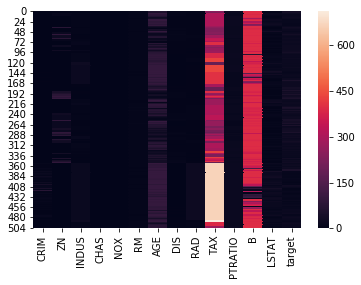

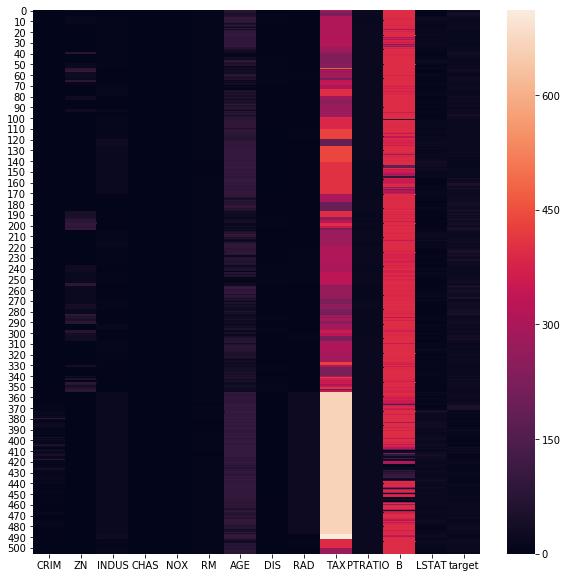

In [114]:
import seaborn as sns
# from seaborn.linearmodels import heatmap,symmatplot

sns.heatmap(df)
# Save to file, remove the big white borders
plt.savefig('attribute_correlations.png', tight_layout=True)

#Make a plot of specified dimension (in inches), just a 1x1 subplot
fig, ax = plt.subplots(figsize=(10,10))
#pass the axis to draw on
sns.heatmap(df, ax=ax)


#We don't want to see coorlation between two features
#We only want to see coorlation between featues and labels

<center><h3>Steps 4 - 6: Creating and Tuning your Regression</h3></center>

For the remainder of the notebook, you'll be creating, fitting, and tweaking your Linear Regression.  

**_TASKS_**:

1. Split your data into training and testing sets using train_test_split (alternatively, you can opt to use K-Fold Cross Validation. Either is available in `sklearn`). 
<br>
<br>
2. Use a [LinearRegression](http://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html) object from SKlearn, and fit it on your training data.  If you run into problems, use the docs and/or Stack Overflow to help!
<br>
<br>
3. Use it to predict for the data in `X_test`, and plot them against the actual values contained in `y_test`.
<br>
<br>
4. Examine your R<sup>2</sup> value.  How much of the variance does your model explain?
<br>
<br>
5. Optional: Tweak your model.  See if you can increase your R<sup>2</sup> by dealing with highly correlated predictors, normalizing your continuous data, etc.  Try whatever data science techniques you've learned so far (or that you can discover on the internet) to make this model more accurate.  

(array([ 3.,  1.,  7.,  7.,  3.,  6.,  8., 10.,  8., 23., 15., 19., 14.,
        16., 18., 28., 36., 29., 33., 28., 37., 21., 15.,  4.,  7., 11.,
         9.,  9.,  5.,  7.,  7.,  8.,  2.,  8.,  5.,  4.,  2.,  1.,  1.,
         0.,  2.,  2.,  2.,  2.,  2.,  1.,  1.,  0.,  3., 16.]),
 array([ 5. ,  5.9,  6.8,  7.7,  8.6,  9.5, 10.4, 11.3, 12.2, 13.1, 14. ,
        14.9, 15.8, 16.7, 17.6, 18.5, 19.4, 20.3, 21.2, 22.1, 23. , 23.9,
        24.8, 25.7, 26.6, 27.5, 28.4, 29.3, 30.2, 31.1, 32. , 32.9, 33.8,
        34.7, 35.6, 36.5, 37.4, 38.3, 39.2, 40.1, 41. , 41.9, 42.8, 43.7,
        44.6, 45.5, 46.4, 47.3, 48.2, 49.1, 50. ]),
 <a list of 50 Patch objects>)

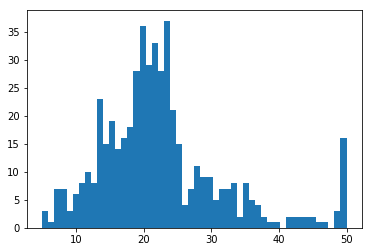

In [74]:
import matplotlib.pyplot as plt
attr = df['target']
plt.hist(attr, bins=50)

<Container object of 9 artists>

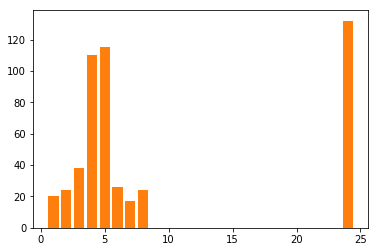

In [76]:
cat_attr = df['RAD']
h = cat_attr.value_counts()
values, counts = h.index, h
plt.bar(values, counts)
# or more compactly:
plt.bar(*list(zip(*cat_attr.value_counts().items())))

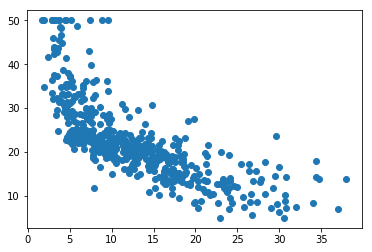

In [115]:
plt.scatter( df['LSTAT'], df['target'])


In [79]:
from sklearn.datasets import load_iris
from sklearn.cross_validation import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics

/Users/briantoliveira/anaconda3/lib/python3.6/site-packages/sklearn/cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [80]:
#Read in the iris data
iris = load_iris()

#Create X (features) and y (response)
X = iris.data
y = iris.target

In [81]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=6)

knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)
metrics.accuracy_score(y_test, y_pred)

0.9736842105263158

In [83]:
from sklearn.cross_validation import KFold
kf = KFold(25, n_folds=5, shuffle=False)

print('{} {:^61} {}'.format('Iteration', 'Training set obsevations', 'Testing set observations'))
for iteration, data in enumerate(kf, start=1):
    print('{!s:^9} {} {!s:^25}'.format(iteration, data[0], data[1]))

Iteration                   Training set obsevations                    Testing set observations
    1     [ 5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24]        [0 1 2 3 4]       
    2     [ 0  1  2  3  4 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24]        [5 6 7 8 9]       
    3     [ 0  1  2  3  4  5  6  7  8  9 15 16 17 18 19 20 21 22 23 24]     [10 11 12 13 14]     
    4     [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 20 21 22 23 24]     [15 16 17 18 19]     
    5     [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19]     [20 21 22 23 24]     


In [85]:
from sklearn.cross_validation import cross_val_score
#Use regressor (fix this)
knn = KNeighborsClassifier(n_neighbors=5)

score = cross_val_score(knn, X, y, cv=10, scoring='accuracy')
print(score)


[1.         0.93333333 1.         1.         0.86666667 0.93333333
 0.93333333 1.         1.         1.        ]


In [86]:
print(score.mean())

0.9666666666666668


In [116]:
#Range of k want to target
k_range = range(1, 31)

#empty list to store score 
k_scores = []

for k in k_range:
    #Run KNeighborsClassifier with k neightbours
    knn = KNeighborsClassifier(n_neighbors=k)
    #Obtain cross_val_score for KNeighborsClassifier with k neighbours
    scores = cross_val_score(knn, X, y, cv=10, scoring='accuracy')
    #append the mean of the score for K neighbors to k_score list
    k_scores.append(scores.mean())
    
print(k_scores)

[0.96, 0.9533333333333334, 0.9666666666666666, 0.9666666666666666, 0.9666666666666668, 0.9666666666666668, 0.9666666666666668, 0.9666666666666668, 0.9733333333333334, 0.9666666666666668, 0.9666666666666668, 0.9733333333333334, 0.9800000000000001, 0.9733333333333334, 0.9733333333333334, 0.9733333333333334, 0.9733333333333334, 0.9800000000000001, 0.9733333333333334, 0.9800000000000001, 0.9666666666666666, 0.9666666666666666, 0.9733333333333334, 0.96, 0.9666666666666666, 0.96, 0.9666666666666666, 0.9533333333333334, 0.9533333333333334, 0.9533333333333334]


In [93]:
print('Length of list', len(k_scores))
print('Max of list', max(k_scores))

Length of list 30
Max of list 0.9800000000000001


Text(0,0.5,'Cross-validated accuracy')

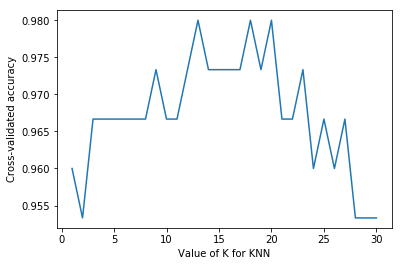

In [94]:
# plot the value of K for KNN (x-axis) versus the cross-validated accuracy (y-axis)
# plt.plot(x_axis, y_axis)
plt.plot(k_range, k_scores)
plt.xlabel('Value of K for KNN')
plt.ylabel('Cross-validated accuracy')

In [96]:
# 10-fold cross-validation with the best KNN model
knn = KNeighborsClassifier(n_neighbors=20)

# Instead of saving 10 scores in object named score and calculating mean
# We're just calculating the mean directly on the results
print(cross_val_score(knn, X, y, cv=10, scoring='accuracy').mean())

0.9800000000000001


In [97]:
from sklearn.linear_model import LogisticRegression 
logreg = LogisticRegression()

print(cross_val_score(logreg, X, y, cv=10, scoring='accuracy').mean())

0.9533333333333334


In [117]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression

lm = LinearRegression()
# lm_fit = lm.fit()

scores = cross_val_score(lm, X, y, cv=10, scoring='mean_squared_error')
print(scores)

[-0.01030626 -0.00579236 -0.01316088 -0.05409482 -0.08438419 -0.10284038
 -0.0352186  -0.07421254 -0.14858161 -0.058886  ]


/Users/briantoliveira/anaconda3/lib/python3.6/site-packages/sklearn/metrics/scorer.py:100: DeprecationWarning: Scoring method mean_squared_error was renamed to neg_mean_squared_error in version 0.18 and will be removed in 0.20.
  sample_weight=sample_weight)
/Users/briantoliveira/anaconda3/lib/python3.6/site-packages/sklearn/metrics/scorer.py:100: DeprecationWarning: Scoring method mean_squared_error was renamed to neg_mean_squared_error in version 0.18 and will be removed in 0.20.
  sample_weight=sample_weight)
/Users/briantoliveira/anaconda3/lib/python3.6/site-packages/sklearn/metrics/scorer.py:100: DeprecationWarning: Scoring method mean_squared_error was renamed to neg_mean_squared_error in version 0.18 and will be removed in 0.20.
  sample_weight=sample_weight)
/Users/briantoliveira/anaconda3/lib/python3.6/site-packages/sklearn/metrics/scorer.py:100: DeprecationWarning: Scoring method mean_squared_error was renamed to neg_mean_squared_error in version 0.18 and will be removed in 0

In [106]:
#Fix the sign of MSE scores - loss function
mse_score = -scores
print(mse_score)

[0.01030626 0.00579236 0.01316088 0.05409482 0.08438419 0.10284038
 0.0352186  0.07421254 0.14858161 0.058886  ]


In [104]:
#Convert from MSE to RMSE
rmse_score = np.sqrt(mse_score)
print(rmse_score)

[0.10151974 0.07610754 0.11472087 0.23258293 0.29048956 0.32068735
 0.1876662  0.27241978 0.38546285 0.24266438]


In [105]:
print(rmse_score.mean())

0.22243211928539314
